---
## **High Dimensional Test Dataset Creation - Paper Test Dataset Creation**
---

<font size="2">Eudald Sangenis  
Creation: 7/11/2022  
Last Update: 7/11/2022  

The objective of this file is to create the High Dimensional Dataset from the Test Dataset used in the IEEE 2022 Sensors Conference Paper.

Parameters High Dimensional Dataset:  
- 6 signals from the IMU  
- variable window size  

Once this dataset is created the next step is to predict the labels and verify the navigation solution.</font>

---
## **<font size="5">1. Libraries</font>**
---

In [1]:
import math
import numpy as np
import pandas as pd  
from tqdm import tqdm                   
import seaborn as sns
import scipy.io as spio
import matplotlib.pyplot as plt

---
## **<font size="5">2. Functions:</font>**
---

In [2]:
# convert deg to radians
def deg_to_rad(dr):
    return (dr*math.pi)/180

# convert the .mat datsets to pandas datframe
def mat2pandas(file_name):
    mat = spio.loadmat(file_name +'.mat')
    mdata = mat['u'];  # variable in mat file
    mdata = np.transpose(mdata)
    # creating df object with columns specified    
    df = pd.DataFrame(mdata, columns = ['acc1','acc2','acc3',
                                        'gyro1','gyro2','gyro3',
                                        'na','timestamp','na2',
                                        'airPressure','samplePeriodS','magnetometer_x',
                                        'magnetometer_y','magnetometer_z','temperatureC',])
    df = df.drop(['na', 'na2','airPressure','samplePeriodS',
                  'magnetometer_x','magnetometer_y','magnetometer_z','temperatureC'], axis=1)
    # reorganize dataset to timestamp be the first column
    df = df[['timestamp','acc1','acc2','acc3','gyro1','gyro2','gyro3']]
    # convert from deg/min -> rad/min
    df['gyro1'] = deg_to_rad(df['gyro1'])
    df['gyro2'] = deg_to_rad(df['gyro2'])
    df['gyro3'] = deg_to_rad(df['gyro3'])
    return df

---
## **<font size="5">3. Empty variables:</font>**
---

In [3]:
x_100_df = pd.DataFrame(); x_200_df = pd.DataFrame(); x_300_df = pd.DataFrame()
x_400_df = pd.DataFrame(); x_500_df = pd.DataFrame(); x_600_df = pd.DataFrame()
x_700_df = pd.DataFrame(); x_800_df = pd.DataFrame(); x_900_df = pd.DataFrame()
x_1000_df = pd.DataFrame(); x_1100_df = pd.DataFrame(); x_1200_df = pd.DataFrame()
x_1300_df = pd.DataFrame(); x_1400_df = pd.DataFrame(); x_1500_df = pd.DataFrame()
x_1600_df = pd.DataFrame(); x_1700_df = pd.DataFrame(); x_1800_df = pd.DataFrame()

X_100_df = pd.DataFrame(); X_200_df = pd.DataFrame(); X_300_df = pd.DataFrame()
X_400_df = pd.DataFrame(); X_500_df = pd.DataFrame(); X_600_df = pd.DataFrame()
X_700_df = pd.DataFrame(); X_800_df = pd.DataFrame(); X_900_df = pd.DataFrame()
X_1000_df = pd.DataFrame(); X_1100_df = pd.DataFrame(); X_1200_df = pd.DataFrame()
X_1300_df = pd.DataFrame(); X_1400_df = pd.DataFrame(); X_1500_df = pd.DataFrame()
X_1600_df = pd.DataFrame(); X_1700_df = pd.DataFrame(); X_1800_df = pd.DataFrame()

---
## **<font size="5">4. Data Handling</font>**
---

In [4]:
window = 51            #51, 101, 201, 401
type_dataset = 'train'
data_dataset = '2022_03_17'
num_signals = 6

# 2 signals
dataset_path_lab = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\2_labeled_datasets\\'+data_dataset+'\\'
# 6 signals
dataset_path_unlab = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\1_unlabeled_datasets\\'+data_dataset+'\\'
# save dataset path
dataset_save = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset+'\\'

In [5]:
datframes_names = (dataset_path_lab+'x_100_df.csv',dataset_path_lab+'x_200_df.csv',dataset_path_lab+'x_300_df.csv',
                   dataset_path_lab+'x_400_df.csv',dataset_path_lab+'x_500_df.csv',dataset_path_lab+'x_600_df.csv',
                   dataset_path_lab+'x_700_df.csv',dataset_path_lab+'x_800_df.csv',dataset_path_lab+'x_900_df.csv',
                   dataset_path_lab+'x_1000_df.csv',dataset_path_lab+'x_1100_df.csv',dataset_path_lab+'x_1200_df.csv',
                   dataset_path_lab+'x_1300_df.csv',dataset_path_lab+'x_1400_df.csv',dataset_path_lab+'x_1500_df.csv',
                   dataset_path_lab+'x_1600_df.csv',dataset_path_lab+'x_1700_df.csv',dataset_path_lab+'x_1800_df.csv')

x_df = map(pd.read_csv, datframes_names); x_df_lst = list(x_df)

datframes_names = (dataset_path_unlab+'exp100_VN',dataset_path_unlab+'exp200_VN',dataset_path_unlab+'exp300_VN',
                   dataset_path_unlab+'exp400_VN',dataset_path_unlab+'exp500_VN',dataset_path_unlab+'exp600_VN',
                   dataset_path_unlab+'exp700_VN',dataset_path_unlab+'exp800_VN',dataset_path_unlab+'exp900_VN',
                   dataset_path_unlab+'exp1000_VN',dataset_path_unlab+'exp1100_VN',dataset_path_unlab+'exp1200_VN',
                   dataset_path_unlab+'exp1300_VN',dataset_path_unlab+'exp1400_VN',dataset_path_unlab+'exp1500_VN',
                   dataset_path_unlab+'exp1600_VN',dataset_path_unlab+'exp1700_VN',dataset_path_unlab+'exp1800_VN')

X_df = map(mat2pandas, datframes_names); X_df_lst = list(X_df)

In [6]:
for i in range(0,len(x_df_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
    exec(f'x_{x[i]}_df = x_df_lst[i]')

for i in range(0,len(X_df_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
    exec(f'X_{x[i]}_df = X_df_lst[i]')

print(x_100_df.shape, X_100_df.shape)

(57816, 5) (57865, 7)


In [7]:
c = ['timestamp','index']
X_100_df = X_100_df.drop(X_100_df.index[:49]).reset_index().drop(columns=c);    X_200_df = X_200_df.drop(X_200_df.index[:49]).reset_index().drop(columns=c)
X_300_df = X_300_df.drop(X_300_df.index[:49]).reset_index().drop(columns=c);    X_400_df = X_400_df.drop(X_400_df.index[:49]).reset_index().drop(columns=c)
X_500_df = X_500_df.drop(X_500_df.index[:49]).reset_index().drop(columns=c);    X_600_df = X_600_df.drop(X_600_df.index[:49]).reset_index().drop(columns=c)
X_700_df = X_700_df.drop(X_700_df.index[:49]).reset_index().drop(columns=c);    X_800_df = X_800_df.drop(X_800_df.index[:49]).reset_index().drop(columns=c)
X_900_df = X_900_df.drop(X_900_df.index[:49]).reset_index().drop(columns=c);    X_1000_df = X_1000_df.drop(X_1000_df.index[:49]).reset_index().drop(columns=c)
X_1100_df = X_1100_df.drop(X_1100_df.index[:49]).reset_index().drop(columns=c); X_1200_df = X_1200_df.drop(X_1200_df.index[:49]).reset_index().drop(columns=c)
X_1300_df = X_1300_df.drop(X_1300_df.index[:49]).reset_index().drop(columns=c); X_1400_df = X_1400_df.drop(X_1400_df.index[:49]).reset_index().drop(columns=c)
X_1500_df = X_1500_df.drop(X_1500_df.index[:49]).reset_index().drop(columns=c); X_1600_df = X_1600_df.drop(X_1600_df.index[:49]).reset_index().drop(columns=c)
X_1700_df = X_1700_df.drop(X_1700_df.index[:49]).reset_index().drop(columns=c); X_1800_df = X_1800_df.drop(X_1800_df.index[:49]).reset_index().drop(columns=c)

X_100_df['label'] = x_100_df['label'];   X_200_df['label'] = x_200_df['label']
X_300_df['label'] = x_300_df['label'];   X_400_df['label'] = x_400_df['label']
X_500_df['label'] = x_500_df['label'];   X_600_df['label'] = x_600_df['label']
X_700_df['label'] = x_700_df['label'];   X_800_df['label'] = x_800_df['label']
X_900_df['label'] = x_900_df['label'];   X_1000_df['label'] = x_1000_df['label']
X_1100_df['label'] = x_1100_df['label']; X_1200_df['label'] = x_1200_df['label']
X_1300_df['label'] = x_1300_df['label']; X_1400_df['label'] = x_1400_df['label']
X_1500_df['label'] = x_1500_df['label']; X_1600_df['label'] = x_1600_df['label']
X_1700_df['label'] = x_1700_df['label']; X_1800_df['label'] = x_1800_df['label']

del x_100_df,x_200_df,x_300_df,x_400_df,x_500_df,x_600_df,x_700_df,x_800_df,x_900_df,x_1000_df,x_1100_df,x_1200_df,x_1300_df,x_1400_df,x_1500_df,x_1600_df,x_1700_df,x_1800_df

In [8]:
if type_dataset == 'train':
    X = pd.concat([X_100_df, X_300_df, X_500_df, X_700_df, X_900_df,
                   X_1100_df, X_1300_df, X_1500_df, X_1700_df], ignore_index = True)

if type_dataset == 'test':
    X = pd.concat([X_200_df, X_400_df, X_600_df, X_800_df, X_1000_df,
                   X_1200_df, X_1400_df, X_1600_df, X_1800_df], ignore_index = True)

X = X.rename(columns={"acc1": "acc1_t", "acc2": "acc2_t", "acc3": "acc3_t", "gyro1": "gyro1_t", "gyro2": "gyro2_t", "gyro3": "gyro3_t"})

X

,acc1_t,acc2_t,acc3_t,gyro1_t,gyro2_t,gyro3_t,label
0,0.049480,0.020245,-0.966540,0.008045,0.002663,0.020730,ZUPT
1,0.050344,0.019859,-0.965713,0.007756,0.003090,0.020838,ZUPT
2,0.049442,0.020100,-0.965527,0.007091,0.003318,0.020846,ZUPT
3,0.049006,0.019358,-0.964957,0.006870,0.003169,0.020474,ZUPT
4,0.049621,0.018727,-0.964618,0.006947,0.002450,0.020432,ZUPT
...,...,...,...,...,...,...,...
309288,0.039091,0.047983,-0.969522,0.012581,0.003247,0.017652,ZUPT
309289,0.038572,0.048589,-0.967682,0.012542,0.003128,0.018178,ZUPT
309290,0.039629,0.049790,-0.966720,0.011865,0.002885,0.018885,ZUPT
309291,0.040159,0.049869,-0.968147,0.011289,0.003168,0.019393,ZUPT


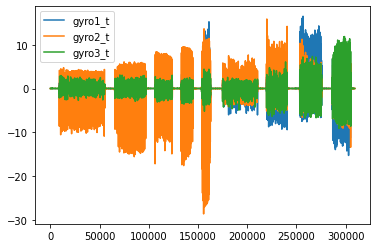

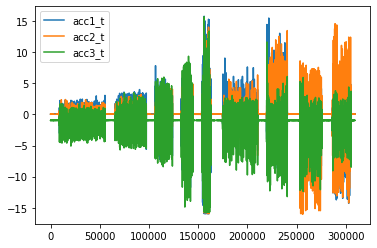

In [9]:
X.plot(y=['gyro1_t','gyro2_t','gyro3_t'], use_index=True)
X.plot(y=['acc1_t','acc2_t','acc3_t'], use_index=True)
plt.show()

del X_100_df,X_200_df,X_300_df,X_400_df,X_500_df,X_600_df,X_700_df,X_800_df,X_900_df,X_1000_df,X_1100_df,X_1200_df,X_1300_df,X_1400_df,X_1500_df,X_1600_df,X_1700_df,X_1800_df

Check if there are nan values:

In [10]:
X.isnull().values.any()

False

In [11]:
s = []
for i in range(window-1,-1,-1):
    s = np.concatenate((s, [f'acc1_t{i}', f'acc2_t{i}', f'acc3_t{i}', f'gyro1_t{i}', f'gyro2_t{i}', f'gyro3_t{i}']))
pd.DataFrame(s).T.to_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv', header=None, index=None, mode='a') 
print('Longitude header df',len(s))

Longitude header df 2406


In [12]:
d = []
for row in tqdm(range(len(X)-window+1)): # range(len(X)-window)
    for i in range(0,window):
        d = np.concatenate((d, X.iloc[row+i,:-1]))
    pd.DataFrame(d).T.to_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv', header=None, index=None, mode='a')    
    d = []

100%|██████████| 308893/308893 [3:21:34<00:00, 25.54it/s]   


In [13]:
t = pd.read_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv')
t

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,0.049480,0.020245,-0.966540,0.008045,0.002663,0.020730,0.050344,0.019859,-0.965713,0.007756,...,-0.965331,0.002857,0.003548,0.020241,0.050146,0.018838,-0.966792,0.003790,0.003211,0.019922
1,0.050344,0.019859,-0.965713,0.007756,0.003090,0.020838,0.049442,0.020100,-0.965527,0.007091,...,-0.966792,0.003790,0.003211,0.019922,0.049113,0.019566,-0.967681,0.004322,0.003226,0.019416
2,0.049442,0.020100,-0.965527,0.007091,0.003318,0.020846,0.049006,0.019358,-0.964957,0.006870,...,-0.967681,0.004322,0.003226,0.019416,0.048558,0.020222,-0.967669,0.005062,0.003488,0.019832
3,0.049006,0.019358,-0.964957,0.006870,0.003169,0.020474,0.049621,0.018727,-0.964618,0.006947,...,-0.967669,0.005062,0.003488,0.019832,0.048629,0.020448,-0.968785,0.005994,0.003739,0.020517
4,0.049621,0.018727,-0.964618,0.006947,0.002450,0.020432,0.050601,0.018916,-0.965114,0.006938,...,-0.968785,0.005994,0.003739,0.020517,0.049445,0.019804,-0.967512,0.005735,0.003913,0.020891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308888,0.039627,0.048518,-0.974833,0.008899,0.003705,0.017932,0.039699,0.046741,-0.974566,0.008849,...,-0.970551,0.012960,0.003818,0.017186,0.039091,0.047983,-0.969522,0.012581,0.003247,0.017652
308889,0.039699,0.046741,-0.974566,0.008849,0.003266,0.018238,0.040580,0.046189,-0.974457,0.008973,...,-0.969522,0.012581,0.003247,0.017652,0.038572,0.048589,-0.967682,0.012542,0.003128,0.018178
308890,0.040580,0.046189,-0.974457,0.008973,0.003466,0.018666,0.040299,0.046561,-0.973280,0.009345,...,-0.967682,0.012542,0.003128,0.018178,0.039629,0.049790,-0.966720,0.011865,0.002885,0.018885
308891,0.040299,0.046561,-0.973280,0.009345,0.003584,0.018854,0.039574,0.047850,-0.972420,0.009281,...,-0.966720,0.011865,0.002885,0.018885,0.040159,0.049869,-0.968147,0.011289,0.003168,0.019393


<AxesSubplot:>

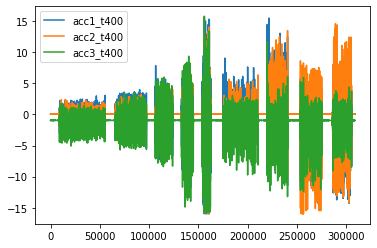

In [14]:
t.iloc[:,0:3].plot()